# Porcelain image classification

#reference : https://www.kaggle.com/vincee/intel-image-classification-cnn-keras

## 0. 분류 클래스 정의
- ID 1 : 백자 끈무늬 병
- ID 2 : 청자 상감 운학문 매병
- ID 3 : 청자 양각 죽철문 병

## 1. Import package

In [3]:
import numpy as np
import os
from sklearn.metrics import confusion_matrix
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import cv2                                 
import tensorflow as tf                
from tqdm import tqdm

In [4]:
class_names = ['1', '2', '3']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)

## 2. Load Data

In [7]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 3,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['./train', './test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                # Append the image and its corresponding label to the output
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [8]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  0%|▉                                                                                                                                                                                                                     | 1/232 [00:00<00:26,  8.57it/s]

Loading ./train


  0%|                                                                                                                                                                                                                               | 0/46 [00:00<?, ?it/s]

Loading ./test


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 40/40 [00:04<00:00,  9.67it/s]


In [9]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

## 3. Explore datasets

In [10]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 689
Number of testing examples: 136
Each image is of size: (150, 150)


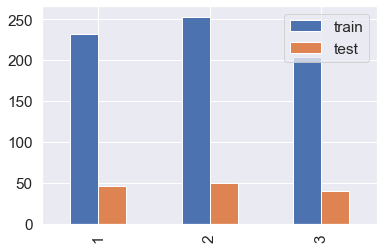

In [11]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

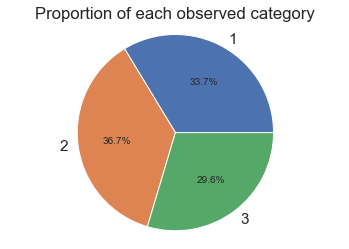

In [13]:
plt.pie(train_counts,
        explode=(0, 0, 0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [14]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

## 4. Visualiza the data

In [15]:
def display_random_image(class_names, images, labels):
    """
        Display a random image from the images array and its correspond label from the labels array.
    """
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

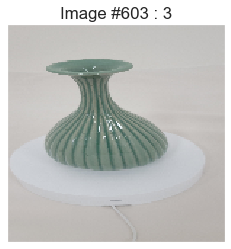

In [16]:
display_random_image(class_names, train_images, train_labels)

In [17]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

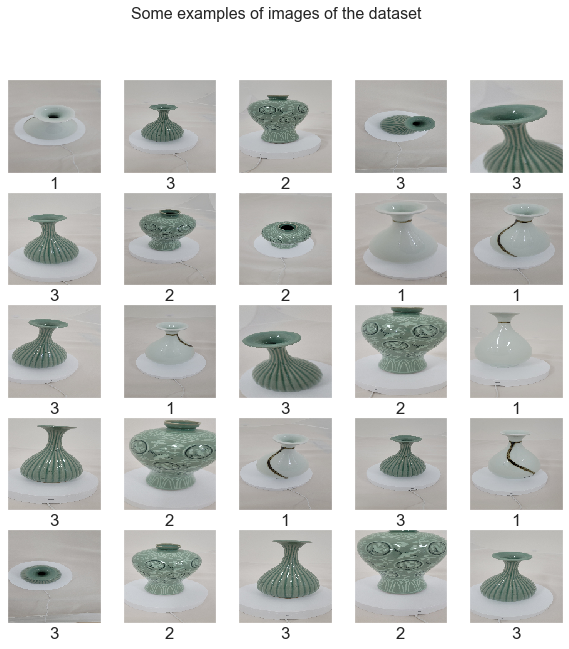

In [18]:
display_examples(class_names, train_images, train_labels)

## 5. CNN model creation

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])

In [20]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split = 0.2)

Train on 551 samples, validate on 138 samples
Epoch 1/20
551/551 [==============================] - 5s 9ms/sample - loss: 3.5718 - accuracy: 0.2777 - val_loss: 1.3853 - val_accuracy: 0.2826
Epoch 2/20
551/551 [==============================] - 4s 8ms/sample - loss: 1.4999 - accuracy: 0.4682 - val_loss: 1.1267 - val_accuracy: 0.3696
Epoch 3/20
551/551 [==============================] - 4s 8ms/sample - loss: 1.0975 - accuracy: 0.3612 - val_loss: 0.9827 - val_accuracy: 0.5217
Epoch 4/20
551/551 [==============================] - 4s 8ms/sample - loss: 0.9235 - accuracy: 0.6497 - val_loss: 0.8480 - val_accuracy: 0.7319
Epoch 5/20
551/551 [==============================] - 4s 8ms/sample - loss: 0.7153 - accuracy: 0.8149 - val_loss: 0.5930 - val_accuracy: 0.8188
Epoch 6/20
551/551 [==============================] - 4s 8ms/sample - loss: 0.4390 - accuracy: 0.8929 - val_loss: 0.4155 - val_accuracy: 0.8333
Epoch 7/20
551/551 [==============================] - 4s 8ms/sample - loss: 0.2756 - accur

In [23]:
model.save_weights("Porcelain_classification.h5")

In [33]:
def plot_accuracy_loss(history):
    """
        Plot the accuracy and the loss during the training of the nn.
    """
    fig = plt.figure(figsize=(10,5))

    # Plot accuracy
    plt.subplot(221)
    plt.plot(history.history['accuracy'],'bo--', label = "accuracy")
    plt.plot(history.history['val_accuracy'], 'ro--', label = "val_accuracy")
    plt.title("train_acc vs val_acc")
    plt.ylabel("accuracy")
    plt.xlabel("epochs")
    plt.legend()

    # Plot loss function
    plt.subplot(222)
    plt.plot(history.history['loss'],'bo--', label = "loss")
    plt.plot(history.history['val_loss'], 'ro--', label = "val_loss")
    plt.title("train_loss vs val_loss")
    plt.ylabel("loss")
    plt.xlabel("epochs")

    plt.legend()
    plt.show()

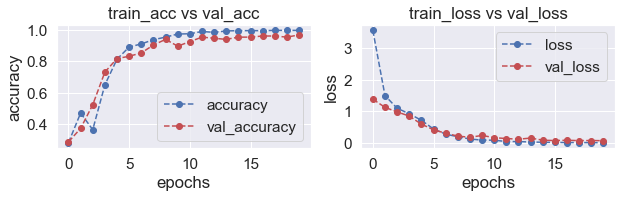

In [34]:
plot_accuracy_loss(history)

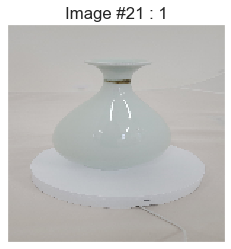

In [29]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

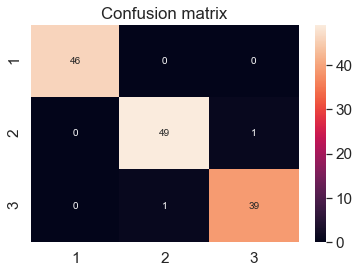

In [32]:
CM = confusion_matrix(test_labels, pred_labels)
ax = plt.axes()
sn.heatmap(CM, annot=True, 
           annot_kws={"size": 10}, 
           xticklabels=class_names, 
           yticklabels=class_names, ax = ax)
ax.set_title('Confusion matrix')
plt.show()